# **DATASET GENERATION**

In [ ]:
import numpy as np

def generate_logistic_regression_dataset(n_samples=1000, n_features=10, seed=42):
    np.random.seed(seed)

    #True theta used for data generation, we will see at the end how close we get to this
    theta_true = np.random.randn(n_features, 1)
    print("True weights used to generate dataset: ", theta_true)

    #Generate features X
    X = np.random.randn(n_samples, n_features)

    #Compute logits and probabilities
    logits = X @ theta_true
    probs = 1 / (1 + np.exp(-logits))  #Sigmoid function to get probabilities

    #Sample labels from Bernoulli, if random number generated is less than the predicted probability, label 1 else 0.
    y = (np.random.rand(n_samples, 1) < probs).astype(int)

    return X, y, theta_true

# Example usage
X, y, theta_true = generate_logistic_regression_dataset()

print("X shape:", X.shape)
print("y shape:", y.shape)
print("True theta shape:", theta_true.shape)


True weights used to generate dataset:  [[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]
 [-0.23413696]
 [ 1.57921282]
 [ 0.76743473]
 [-0.46947439]
 [ 0.54256004]]
X shape: (1000, 10)
y shape: (1000, 1)
True theta shape: (10, 1)


Range to generate true weights is [-2,2] because a larger magnitude will lead to the logit score being high in magnitude, which will lean sharply towards 0 or 1. So the uncertainty factor is reduced, this is easy for the model. Our range encapsulates that uncertainty well.
Even for feature generation the range we used is -5,5 because of the same reason. Too small of a value will negligibly change the logit, too big might explode the logit values.

**Adding  noise- incomplete**

In [ ]:
import pandas as pd
import numpy as np

# Add noise to X and y, return DataFrames
def add_noise_to_dataset(X, y, x_noise_std=0.1, y_flip_ratio=0.05, seed=42):
    np.random.seed(seed)

    # Add Gaussian noise to X
    X_noisy = X + np.random.normal(0, x_noise_std, X.shape)

    # Flip a percentage of y labels (simulate label noise)
    y_noisy = y.copy()
    n_flips = int(len(y) * y_flip_ratio)
    flip_indices = np.random.choice(len(y), n_flips, replace=False)
    y_noisy[flip_indices] = 1 - y_noisy[flip_indices]

    # Convert to DataFrames
    X_df = pd.DataFrame(X_noisy, columns=[f"x{i}" for i in range(X.shape[1])])
    y_df = pd.DataFrame(y_noisy, columns=["label"])

    return X_df, y_df

# Example usage
X_noisy_df, y_noisy_df = add_noise_to_dataset(X, y)

# Display the first few rows
print("X noisy DataFrame:\n", X_noisy_df.head())
print("\ny noisy DataFrame:\n", y_noisy_df.head())


In [ ]:
import numpy as np
import pandas as pd

#SAME AS ABOVE CODE BUT MORE STRUCTURED USING PANDAS



#set random seed
np.random.seed(42)

#parameters
n_samples = 100000
n_features = 10

#Generate theta_true (ground-truth weights)
theta_true = np.random.uniform(-2, 2, (n_features, 1))
print("✅ theta_true (shape:", theta_true.shape, "):\n", theta_true)
theta_true_df=pd.DataFrame(theta_true, columns=["Components/features"])   #convert it to a dataframe using pandas
print(theta_true_df.head())

#Generate feature matrix X
X = np.random.uniform(-5, 5, (n_samples, n_features))
print("\n✅ X (shape:", X.shape, "):")
X_df=pd.DataFrame(X, columns=[f"x{i}" for i in range(n_features)])    #convert to dataframe, with each feature's name as Xi
print(X_df.head())

#Compute logits
logits = X @ theta_true  #matrix multiplication using numpy
print("\n✅ logits (shape:", logits.shape, "):")
logits_df=pd.DataFrame(logits, columns=["logit"]) #again, make a dataframe of logits
print(logits_df.head())

#Compute probabilities using sigmoid
probs = 1 / (1 + np.exp(-logits))
print("\n✅ probabilities (shape:", probs.shape, "):")
probabilities_df=pd.DataFrame(probs, columns=["probability"])   #dataframe them
print(probabilities_df.head())

#Sample y from Bernoulli distribution
y = (np.random.rand(n_samples, 1) < probs).astype(int)
print("\n✅ y labels (shape:", y.shape, "):")
y_df=pd.DataFrame(y, columns=["y"])
print(y_df.head())

#Combine probabilities and labels into one DataFrame
probs_y_df = pd.DataFrame({
    "probability": probs.flatten(),
    "y": y.flatten()
})

#Show first few rows
print("✅ Combined probabilities and y DataFrame:")
print(probs_y_df.head())

#Show all columns and increase line width
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)

✅ theta_true (shape: (10, 1) ):
 [[-0.50183952]
 [ 1.80285723]
 [ 0.92797577]
 [ 0.39463394]
 [-1.37592544]
 [-1.37602192]
 [-1.76766555]
 [ 1.46470458]
 [ 0.40446005]
 [ 0.83229031]]
   Components/features
0            -0.501840
1             1.802857
2             0.927976
3             0.394634
4            -1.375925

✅ X (shape: (100000, 10) ):
         x0        x1        x2        x3       x4        x5        x6        x7        x8        x9
0 -4.794155  4.699099  3.324426 -2.876609 -3.18175 -3.165955 -1.957578  0.247564 -0.680550 -2.087709
1  1.118529 -3.605061 -2.078554 -1.336382 -0.43930  2.851760 -3.003262  0.142344  0.924146 -4.535496
2  1.075449 -3.294759 -4.349484  4.488855  4.65632  3.083973 -1.953862 -4.023279  1.842330 -0.598475
3 -3.779618 -0.048231 -4.656115  4.093204 -2.41220  1.625223 -1.882889  0.200680  0.467103 -3.151455
4  4.695846  2.751328  4.394989  3.948274  0.97900  4.218742 -4.115075 -3.040171 -4.547727 -1.746697

✅ logits (shape: (100000, 1) ):
       log

In [ ]:
True_Weight=theta_true
print(True_Weight)

[[-0.50183952]
 [ 1.80285723]
 [ 0.92797577]
 [ 0.39463394]
 [-1.37592544]
 [-1.37602192]
 [-1.76766555]
 [ 1.46470458]
 [ 0.40446005]
 [ 0.83229031]]


In [ ]:
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
directory = '/content/drive/My Drive/OELP_Sem4/Dataset'

#Save your DataFrame as a CSV file in the directory
probs_y_df.to_csv(f'{directory}/probs_y_df.csv', index=False)
X_df.to_csv(f'{directory}/X_df.csv', index=False)
logits_df.to_csv(f'{directory}/logits_df.csv', index=False)
theta_true_df.to_csv(f'{directory}/theta_true_df.csv', index=False)


print("File saved successfully to Google Drive!")


# **LOGISTIC REGRESSION MODEL**

In [ ]:
import numpy as np

n_samples, n_features = X.shape # dimensions of the inputs(ie vextor X) here we have 100000 samples and 10 features.
theta = np.zeros((n_features, 1))  # initial theta is array of 10 zeros. [column vector]

In [ ]:
def sigmoid(z): #sigmoid function which is the logistic rgeression model's main function (activation function)
    return 1 / (1 + np.exp(-z))

In [ ]:
def predict_probs(X, theta):
    logits = X @ theta  # (n_samples, 1)
    return sigmoid(logits)  # probabilities that are predicted.

**LOGLOSS FUNCTION**

In [ ]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #lower and upper bounding
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) #logloss function
    return loss

In [ ]:
def compute_gradient(X, y_true, y_pred):
    grad=(X.T @ (y_pred - y_true)) / len(y_true)
    return grad
    #x.t means transpose of x
    #final shape - (n_features, 1)

In [ ]:
def update_theta(theta, grad, lr=0.01):
    return theta - lr * grad
  #lr - learning rate

**TRAINING**

In [ ]:
#TRAIN FOR FIXED ITERATIONS
def train(X, y, lr=0.1, epochs=500):
    y = y.reshape(-1, 1)  # ensure it's a column vector
    losses = []
    n_samples, n_features = X.shape # dimensions of the inputs(ie vextor X) here we have 100000 samoples and 10 features.
    theta = np.zeros((n_features, 1))  # initial assumed theta (weights) is array of 10 zeros. [column vector]
    for epoch in range(epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)
        theta = update_theta(theta, grad, lr)

        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
            print(f"Theta({epoch}: )")
            print(theta)

    return theta, losses


In [ ]:
theta_final_fixed_iter, losslist_fixed_iter = train(X,y)

In [ ]:

#TRAIN UNTIL SECOND ORDER DIFFERENCE UNDER A THRESHOLD
#this checks difference of change in gradient

def train_with_second_diff(X, y, lr=0.1, max_epochs=5000, tol=1e-9):
    y = y.reshape(-1, 1)
    losses = []
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))

    prev_grad = np.zeros_like(theta)
    prev_prev_grad = np.zeros_like(theta)

    for epoch in range(max_epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        #Update weights
        theta = update_theta(theta, grad, lr)
        losses.append(loss)

        #Print every 10 steps
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        #Only compute second diff after first 2 steps
        if epoch >= 2:
            second_diff = np.linalg.norm(grad - 2 * prev_grad + prev_prev_grad)     #this is |(curr_grad-prev_grad) - (prev_grad - prev_prev_grad)|
            if second_diff < tol:
                print(f"Converged at epoch {epoch} with 2nd-order grad diff < {tol}")
                break

        # Update stored gradients for next step
        prev_prev_grad = prev_grad
        prev_grad = grad

    return theta, losses, epoch


In [ ]:
theta_final_2d, losslist_2d, epochs_2d = train_with_second_diff(X,y)

In [ ]:

#TRAIN UNTIL SECOND ORDER DIFFERENCE UNDER A THRESHOLD
#this checks difference of change in gradient

def train_with_second_diff_and_loss_change(X, y, lr=0.1, max_epochs=5000, tol=1e-9):
    y = y.reshape(-1, 1)
    losses = []
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))

    prev_loss = None

    prev_grad = np.zeros_like(theta)
    prev_prev_grad = np.zeros_like(theta)

    for epoch in range(max_epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        #Update weights
        theta = update_theta(theta, grad, lr)
        losses.append(loss)

        #Print every 10 steps
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        #Only compute second diff after first 2 steps
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(grad - 2 * prev_grad + prev_prev_grad)     #this is |(curr_grad-prev_grad) - (prev_grad - prev_prev_grad)|
            if abs(loss - prev_loss) < 1e-6:
              stagnant_steps += 1
            else:
              stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              print(f"Converged at epoch {epoch} with 2nd-order grad diff and log loss change method")
              break


        # Update stored gradients for next step
        prev_prev_grad = prev_grad
        prev_grad = grad
        prev_loss = loss

    return theta, losses, epoch


In [ ]:
theta_final_2d_loss_change, losslist_2d_loss_change, epochs_2d_loss_change = train_with_second_diff_and_loss_change(X,y)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losslist_fixed_iter)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


NOTICE the graph still seems to be going down, meaning we have probably not reached convergence yet, that means we should try another way to converge.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losslist_2d)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


NOTICE THAT - Log loss is BARELY changing after about 800 iterations, we are doing 2000 more after that. This means our computing is becoming redundant after some point, so solely relying on second order difference of gradients may not be a good idea in terms of resource saving.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losslist_2d_loss_change)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


Successfully reduced about 1000 iterations which is good to save computing resources compared to only using second difference of gradient. Again it all depends on threshold we pick, but these are the general values we want if we want a good approximation.

In [ ]:
error_fixed = theta_final_fixed_iter - theta_true.reshape(-1, 1)
l2_norm_fixed = np.linalg.norm(error_fixed)
print("L2 norm of error vector using fixed iterations training model:", l2_norm_fixed)

error_2d = theta_final_2d - theta_true.reshape(-1, 1)
l2_norm_2d = np.linalg.norm(error_2d)
print("L2 norm of error vector using second difference gradient model:", l2_norm_2d)

error_2d_logloss_change = theta_final_2d_loss_change - theta_true.reshape(-1, 1)
l2_norm_2d_logloss_change = np.linalg.norm(error_2d_logloss_change)
print("L2 norm of error vector using second difference gradient + log loss change model:", l2_norm_2d_logloss_change)
#print("Difference between the true value and predicted weights is:")
#print((True_Weight-theta_final_fixed_iter))

You can compare the difference between the weights we found and the actual weights clearly here

# **QUANTIZED GRADIENT DESCENT STATIC**

In [ ]:
def encode_gradient(gradient, bit_alloc):
    encoded_bits = ''
    for g, bits in zip(gradient, bit_alloc):
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        q_index = int(round((g + 1) / step_size))  # Find the quantized index
        q_index = min(num_levels - 1, max(0, q_index))  # Clip index to be within bounds
        bin_str = format(q_index, f'0{bits}b')  # Convert index to binary string
        encoded_bits += bin_str  # Concatenate to form final encoded string
    return encoded_bits

# Decoding Function: Convert the encoded gradient back
def decode_gradient(encoded_bits, bit_alloc):
    decoded_grad = []
    idx = 0
    for bits in bit_alloc:
        seg = encoded_bits[idx:idx + bits]
        idx += bits
        q_index = int(seg, 2)  # Convert binary string back to integer
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        val = -1 + q_index * step_size + (step_size / 2.0)  # Decode back to original value
        decoded_grad.append(val)
    return decoded_grad


def train_with_quantization(X, y, lr=0.1, max_epochs=5000, tol=1e-9, bit_alloc=None):
    y = y.reshape(-1, 1)
    losses = []

    n_samples, n_features = X.shape
    theta_client = np.zeros((n_features, 1))  # Client's theta
    theta_server = np.zeros((n_features, 1))  # Server's theta

    prev_grad = np.zeros_like(theta_client)   #initialize as all zeroes
    prev_prev_grad = np.zeros_like(theta_client)
    prev_loss = None    #so that we dont compute change in log loss in the first iteration
    stagnant_steps = 0

    for epoch in range(max_epochs):
        # Client-side: predict, compute gradient
        y_pred = predict_probs(X, theta_client)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        # Quantize and encode the gradient (flatten to 1D)
        encoded = encode_gradient(grad.flatten(), bit_alloc)

        # Simulate transmission to server (bit_alloc + encoded)
        # Server decodes
        decoded_grad = np.array(decode_gradient(encoded, bit_alloc)).reshape(-1, 1)

        # Server updates theta
        theta_server = update_theta(theta_server, decoded_grad, lr)

        # Client also updates theta (for consistency)
        theta_client = update_theta(theta_client, decoded_grad, lr)

        # Track loss
        losses.append(loss)

        # Print every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        # Convergence check
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(decoded_grad - 2 * prev_grad + prev_prev_grad)
            if abs(loss - prev_loss) < 1e-6:
                stagnant_steps += 1
                print("stagnant", stagnant_steps)
            else:
                stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              if stagnant_steps >= 50:
                print("Log loss stagnant")
              else:
                print("Difference in difference of gradient threshold reached ")

              print(f"Converged at epoch {epoch}")
              break

        # Update previous gradients and loss
        prev_prev_grad = prev_grad
        prev_grad = decoded_grad
        prev_loss = loss

    return theta_server, losses, epoch


In [ ]:
theta_server, losslist_quant, epochs_quant = train_with_quantization(X,y,bit_alloc = [4]*10)

Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.313856
Epoch 20, Loss: 0.263270
Epoch 30, Loss: 0.235723
Epoch 40, Loss: 0.216742
Epoch 50, Loss: 0.200927
Epoch 60, Loss: 0.191783
Epoch 70, Loss: 0.184364
Epoch 80, Loss: 0.178829
Epoch 90, Loss: 0.174873
Epoch 100, Loss: 0.171359
Epoch 110, Loss: 0.168121
Epoch 120, Loss: 0.167045
Epoch 130, Loss: 0.166517
Epoch 140, Loss: 0.164054
Epoch 150, Loss: 0.166004
Epoch 160, Loss: 0.165133
Epoch 170, Loss: 0.166109
Epoch 180, Loss: 0.167462
Epoch 190, Loss: 0.166643
Epoch 200, Loss: 0.169182
Epoch 210, Loss: 0.168814
Epoch 220, Loss: 0.172524
Epoch 230, Loss: 0.172529
Epoch 240, Loss: 0.174187
Epoch 250, Loss: 0.177572
Epoch 260, Loss: 0.179490


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losslist_quant)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


OBSERVATION -

When we used 2 bits per attribute, it started diverging. Makes sense as there are only 4 values it can map to, thus it is very distorted, like stepping in the dark pretty much. So the direction of movement gets messed up and we get a diverging graph. Same with using 3 for each.

HOW TO COUNTER THE ABOVE?

When I used 4 bits it dipped until a certain point, then increased a bit a became stagnant. What we observed was that the threshold wasn't getting triggered, it was hovering around.
So for that case I increased log loss difference threshold to 1e-5 from 1e-6.

When I used 10 per attribute it is ok, converging for our originally intended thresholds.

In [ ]:
error_qgd = theta_server - theta_true.reshape(-1, 1)
l2_norm_qgd = np.linalg.norm(error_qgd)
print("L2 norm of error vector using second difference gradient model:", l2_norm_qgd)

In [ ]:
results = {}

#assume minimum we will give 4 bits to each attribute and we have a budget of 100 attributes total

bit_allocations = {
    "uniform": [10] * 10,
    "front_heavy": [12, 12, 11, 9, 8, 8, 8, 8, 7, 7],
    "middle_heavy": [6, 7, 10, 12, 13, 12, 10, 7, 6, 7],
    "back_heavy": [5, 5, 6, 7, 8, 8, 10, 12, 19, 20],
    "slight_priority": [9, 9, 9, 10, 10, 10, 11, 11, 10, 11],
    "single_focus": [4, 4, 4, 4, 4, 4, 4, 4, 4, 64]
}

for name, bit_alloc in bit_allocations.items():
    print(f"Running {name} allocation...")
    theta, losses, epochs = train_with_quantization(X, y, bit_alloc = bit_alloc)
    results[name] = {
        "theta": theta,
        "losses": losses,
        "epochs": epochs,
        "final_loss": losses[-1] if losses else None
    }


Running uniform allocation...
Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.302918
Epoch 20, Loss: 0.240723
Epoch 30, Loss: 0.212239
Epoch 40, Loss: 0.195162
Epoch 50, Loss: 0.183558
Epoch 60, Loss: 0.175024
Epoch 70, Loss: 0.168457
Epoch 80, Loss: 0.163221
Difference in difference of gradient threshold reached 
Converged at epoch 80
Running front_heavy allocation...
Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.302776
Epoch 20, Loss: 0.240680
Epoch 30, Loss: 0.212142
Difference in difference of gradient threshold reached 
Converged at epoch 32
Running middle_heavy allocation...
Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.304631
Epoch 20, Loss: 0.243058
Epoch 30, Loss: 0.214943
Epoch 40, Loss: 0.198295
Epoch 50, Loss: 0.186639
Difference in difference of gradient threshold reached 
Converged at epoch 53
Running back_heavy allocation...
Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.306635
Epoch 20, Loss: 0.245828
Epoch 30, Loss: 0.216322
Epoch 40, Loss: 0.201215
Epoch 50, Loss: 0.192042
Epoch 60, Los

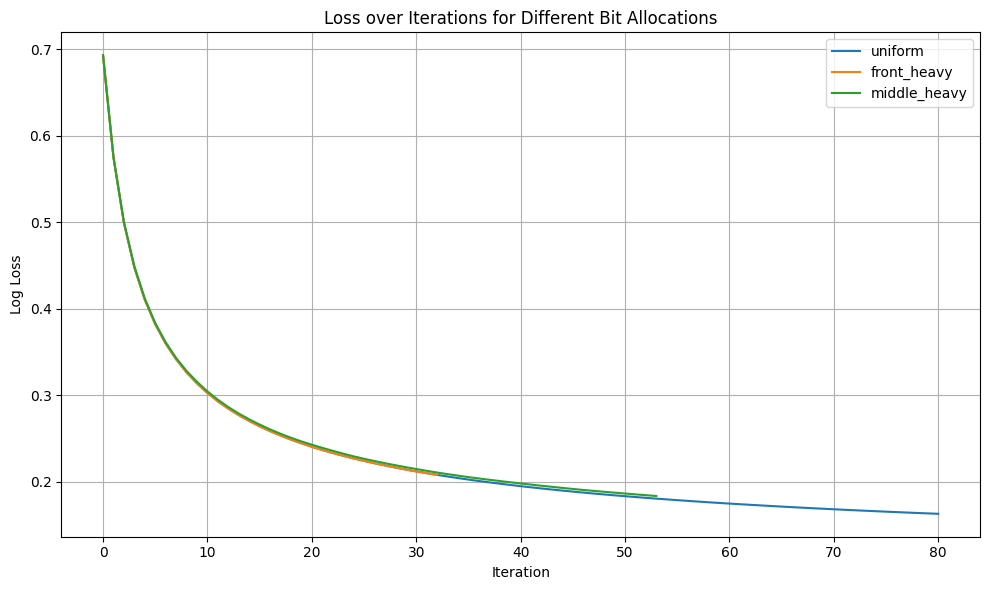

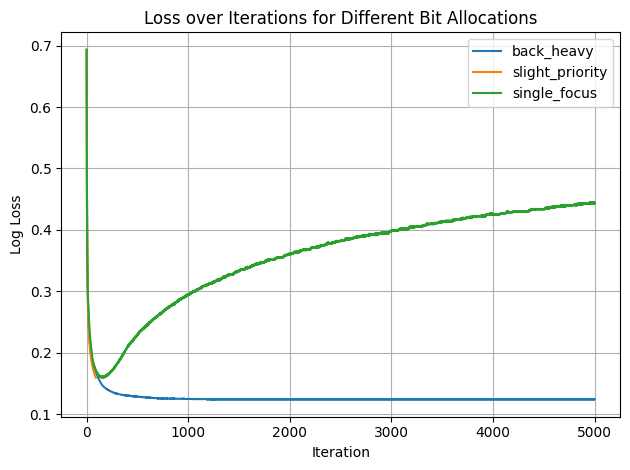

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
i = 1
for m in bit_allocations.keys():
    plt.plot(results[m]["losses"], label=m)
    if i % 3== 0:
      plt.xlabel('Iteration')
      plt.ylabel('Log Loss')
      plt.title('Loss over Iterations for Different Bit Allocations')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()
    i += 1


# **DYNAMIC BIT ALLOCATION ATTEMPT**

In [ ]:
import numpy as np

def importance_based_allocation_budgeted(grad, prev_grad, prev_prev_grad, total_budget=100, min_bits=2, epsilon=1e-8):
    delta = grad - prev_grad
    delta_prev = prev_grad - prev_prev_grad
    second_order = np.abs(delta - delta_prev)
    first_order = np.abs(delta) + epsilon
    ratio = second_order / first_order

    # Normalize importance to sum to 1
    importance = ratio / (np.sum(ratio) + epsilon)

    # Initial raw allocation (float bits per feature)
    raw_alloc = importance * total_budget

    # Enforce min_bits
    bit_alloc = np.maximum(raw_alloc, min_bits)

    # If sum > budget due to enforcing min_bits, adjust
    excess = np.sum(bit_alloc) - total_budget
    if excess > 0:
        # Scale down the adjustable part
        adjustable = bit_alloc - min_bits
        scale = (np.sum(adjustable) - excess) / (np.sum(adjustable) + epsilon)
        bit_alloc = min_bits + adjustable * max(scale, 0)

    # Final bit allocation (integer)
    return np.round(bit_alloc.flatten()).astype(int).tolist()


In [ ]:
import matplotlib.pyplot as plt

attribute_dict = {}

def store_bit_allocation(bit_allocation):
  global attribute_dict
  for i in range(len(bit_allocation)):
    attribute_dict[f"Attribute {i+1}"].append(bit_allocation[i])



def encode_gradient(gradient, bit_alloc):
    encoded_bits = ''
    for g, bits in zip(gradient, bit_alloc):
        #print(bits)
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        q_index = int(round((g + 1) / step_size))  # Find the quantized index
        q_index = min(num_levels - 1, max(0, q_index))  # Clip index to be within bounds
        bin_str = format(q_index, f'0{bits}b')  # Convert index to binary string
        encoded_bits += bin_str  # Concatenate to form final encoded string
    return encoded_bits

# Decoding Function: Convert the encoded gradient back
def decode_gradient(encoded_bits, bit_alloc):
    decoded_grad = []
    idx = 0
    for bits in bit_alloc:
        seg = encoded_bits[idx:idx + bits]
        idx += bits
        q_index = int(seg, 2)  # Convert binary string back to integer
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        val = -1 + q_index * step_size + (step_size / 2.0)  # Decode back to original value
        decoded_grad.append(val)
    return decoded_grad


def train_with_quantization_dynamic(X, y, lr=0.1, max_epochs=5000, tol=1e-9, bit_alloc=None):
    global attribute_dict
    y = y.reshape(-1, 1)
    losses = []

    n_samples, n_features = X.shape
    theta_client = np.zeros((n_features, 1))  # Client's theta
    theta_server = np.zeros((n_features, 1))  # Server's theta

    prev_grad = np.zeros_like(theta_client)   #initialize as all zeroes
    prev_prev_grad = np.zeros_like(theta_client)
    prev_loss = None    #so that we dont compute change in log loss in the first iteration
    stagnant_steps = 0
    attribute_dict = {}
    for i in range(n_features):
      attribute_dict[f"Attribute {i+1}"] = []

    for epoch in range(max_epochs):
        # Client-side: predict, compute gradient
        y_pred = predict_probs(X, theta_client)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        # Quantize and encode the gradient (flatten to 1D)
        #encoded = encode_gradient(grad.flatten(), bit_alloc)
        # Dynamically compute bit allocation based on second-order gradient change
        bit_alloc = importance_based_allocation_budgeted(
            grad=grad,
            prev_grad=prev_grad,
            prev_prev_grad=prev_prev_grad,
            total_budget=100,   # You can change this
            min_bits=4
        )
        store_bit_allocation(bit_alloc)

        # Quantize and encode the gradient
        encoded = encode_gradient(grad.flatten(), bit_alloc)


        # Simulate transmission to server (bit_alloc + encoded)
        # Server decodes
        decoded_grad = np.array(decode_gradient(encoded, bit_alloc)).reshape(-1, 1)

        # Server updates theta
        theta_server = update_theta(theta_server, decoded_grad, lr)

        # Client also updates theta (for consistency)
        theta_client = update_theta(theta_client, decoded_grad, lr)

        # Track loss
        losses.append(loss)

        # Print every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        # Convergence check
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(decoded_grad - 2 * prev_grad + prev_prev_grad)
            if abs(loss - prev_loss) < 1e-6:
                stagnant_steps += 1
                print("stagnant", stagnant_steps)
            else:
                stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              if stagnant_steps >= 50:
                print("Log loss stagnant")
              else:
                print("Difference in difference of gradient threshold reached ")

              print(f"Converged at epoch {epoch}")
              break

        # Update previous gradients and loss
        prev_prev_grad = prev_grad
        prev_grad = decoded_grad
        prev_loss = loss

    return theta_server, losses, epoch, attribute_dict


In [ ]:
theta_dynamic, losses_dynamic, epochs_dynamic, attribute_bits = train_with_quantization_dynamic(X,y)

Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.305352
Epoch 20, Loss: 0.244026
Epoch 30, Loss: 0.219122
Epoch 40, Loss: 0.204051
Epoch 50, Loss: 0.193064
Epoch 60, Loss: 0.185753
Epoch 70, Loss: 0.179115
Epoch 80, Loss: 0.174530
Epoch 90, Loss: 0.168645
Epoch 100, Loss: 0.169614
Epoch 110, Loss: 0.171153
Epoch 120, Loss: 0.168868
Epoch 130, Loss: 0.162545
Epoch 140, Loss: 0.164573
Epoch 150, Loss: 0.158909
Epoch 160, Loss: 0.158580
Epoch 170, Loss: 0.152356
Epoch 180, Loss: 0.153573
Epoch 190, Loss: 0.151813
Epoch 200, Loss: 0.149724
Epoch 210, Loss: 0.150163
Epoch 220, Loss: 0.152774
Epoch 230, Loss: 0.151049
Epoch 240, Loss: 0.147591
Epoch 250, Loss: 0.146952
Epoch 260, Loss: 0.146585
Epoch 270, Loss: 0.144577
Epoch 280, Loss: 0.144448
Epoch 290, Loss: 0.148018
Epoch 300, Loss: 0.146645
Epoch 310, Loss: 0.162157
Epoch 320, Loss: 0.161987
Epoch 330, Loss: 0.163351
Epoch 340, Loss: 0.159533
Epoch 350, Loss: 0.156676
Epoch 360, Loss: 0.151907
Epoch 370, Loss: 0.153434
Epoch 380, Loss: 0.1527

iss oscillating bhai

In [ ]:
# Plot loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def plot_dict_of_lists(data_dict, title="Plot per Key Over Iterations", xlabel="Iteration", ylabel="Bits"):
    plt.figure(figsize=(10, 5))

    for key, values in data_dict.items():
        downsampled_values = values[::250]  # Take every 100th value
        iterations = list(range(0, len(values), 250))
        plt.plot(iterations, downsampled_values, label=str(key))


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_dict_of_lists(attribute_bits)


NameError: name 'attribute_bits' is not defined

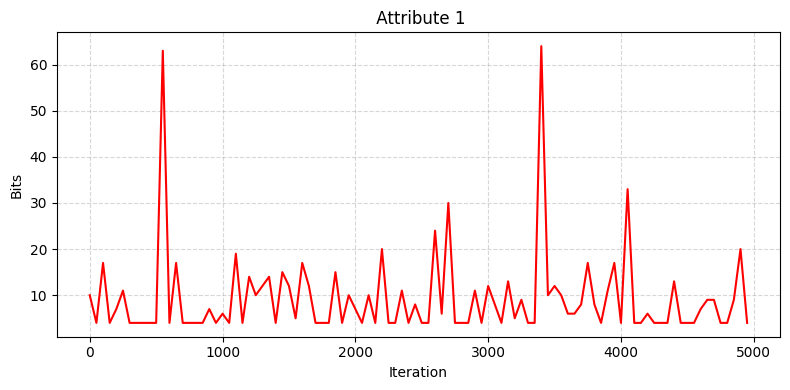

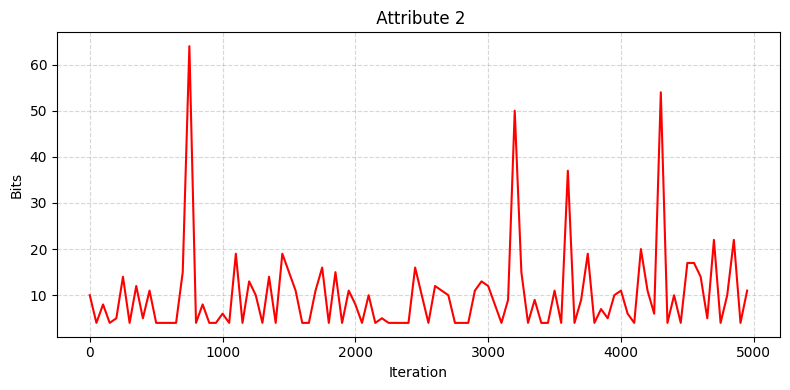

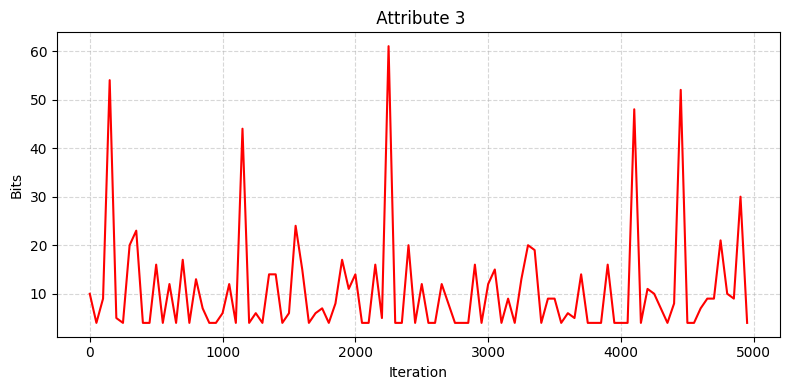

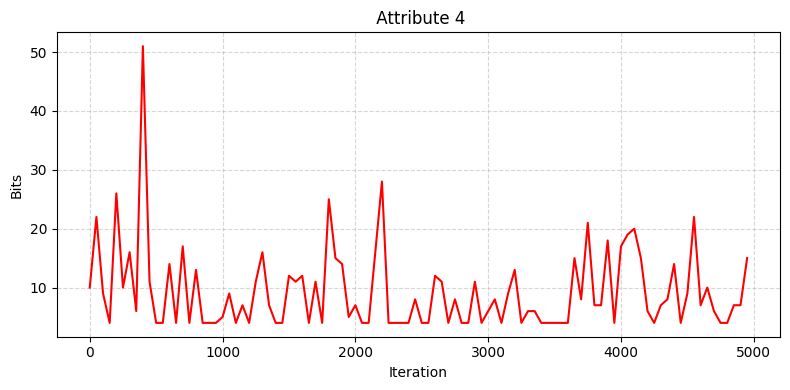

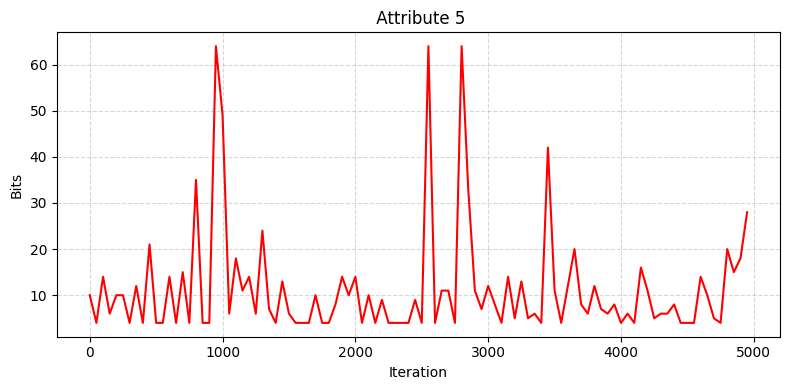

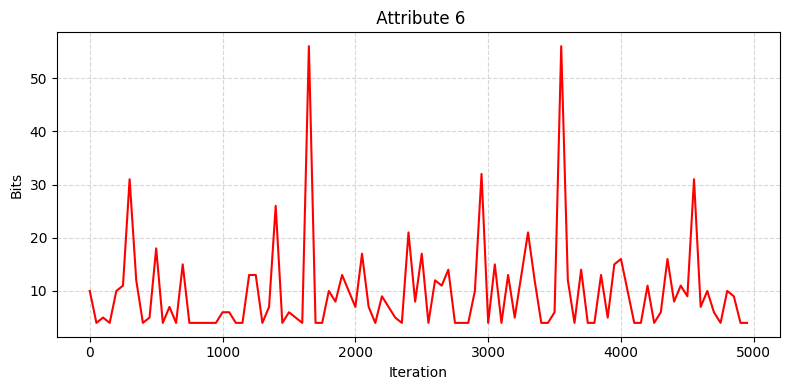

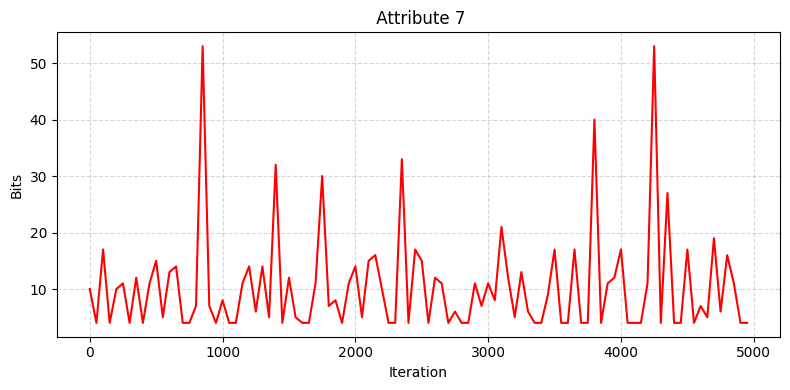

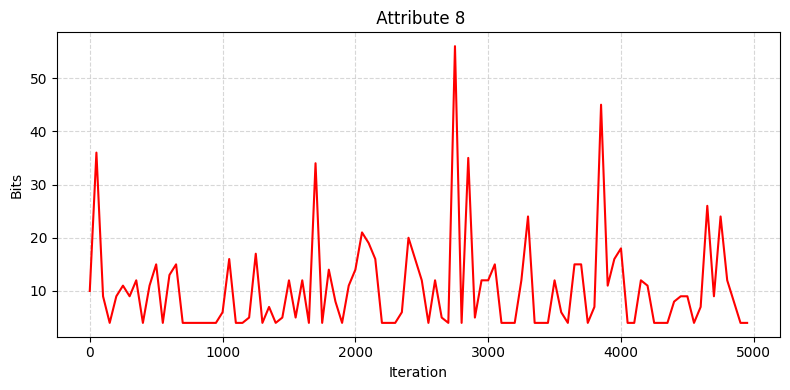

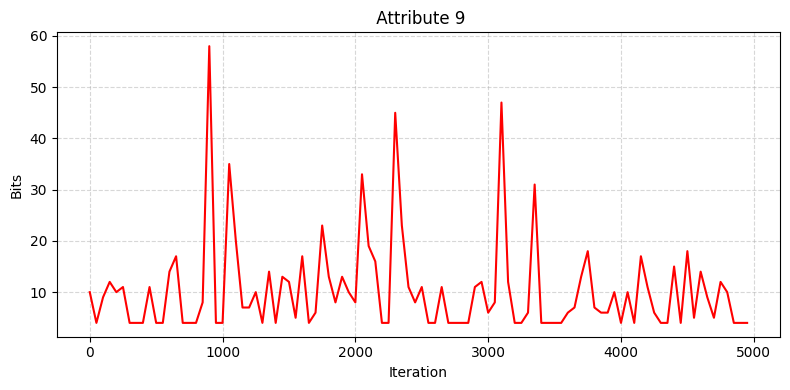

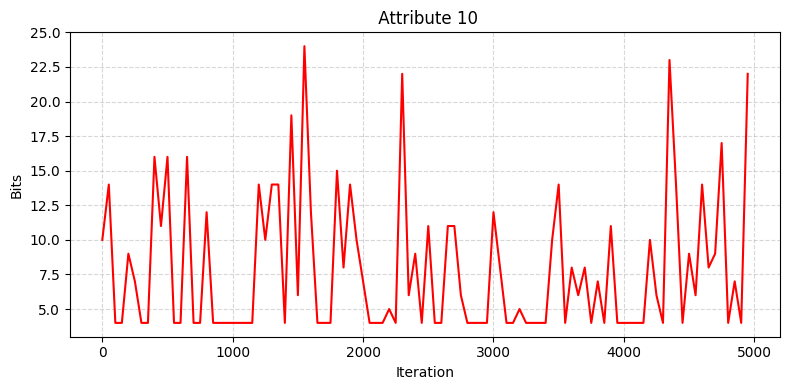

In [ ]:
import matplotlib.pyplot as plt

def plot_each_attribute_separately(data_dict, title_prefix="", xlabel="Iteration", ylabel="Bits"):
    for key, values in data_dict.items():
        downsampled_values = values[::50]  # Every 100th value
        iterations = list(range(0, len(values), 50))

        plt.figure(figsize=(8, 4))
        plt.plot(iterations, downsampled_values, color='red')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f"{title_prefix} {key}")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Example usage
plot_each_attribute_separately(attribute_bits)


INFER STATIC VS DYNAMIC